We import titanic dataset from the example datasets stored by the seaborn package. 

In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
age = titanic['age']

In [5]:
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [6]:
age.shape

(891,)

In [7]:
age.isnull().sum()

177

In [8]:
print(round((age.isnull().sum() / age.shape[0])*100, 3),"%")

19.865 %


About 20 percent of age data is missing. We can fill in the NaN values with the mean. 

In [13]:
mean = round(age.mean()) # Rounded to the nearest 10s since age is an integer.


In [14]:
mean

30

In [15]:
age.fillna(mean,inplace=True)

In [16]:
age.isnull().sum()

0

In [17]:
import matplotlib.pyplot as plt

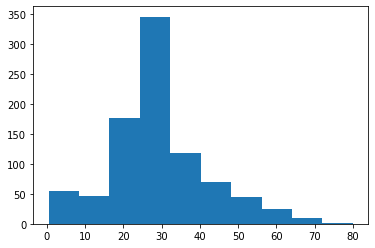

In [18]:
plt.hist(age)
plt.show()

This distribution is Gaussian-like. 

#### Checking for Outliers

Since the distribution is Gaussian-like, we can proceed and get standard deviations. 


In [19]:
min_val = age.mean() - (3*age.std())
min_val

-9.248821230573899

The min value is -9.248, the graph shows no value below this min value, hence there are no outliers at the left tail of the Gaussian distribution. 


In [20]:
max_val = age.mean() + (3*age.std())
max_val

68.76659900835168

This means that any ages above 68.766 years are outliers. 


#### Count the number of instances that are above the max value to decide how to handle them. 


In [21]:
outliers = age[age > max_val]
outliers.count()

7

There are only 7 outliers and they are true values, so they can be deleted. 



#### Categorical feature

discrete values, typically belonging to  finite set of categories. Can be nominal (categories that do no follow a specific order e.g. music genre / city names) or ordinal (categories with sense of order e.g. clothing size / level of education). 


### Feature Engineering

generates a label encoding that assigns a numeric value to each category, this value will then replace the category in the dataset. 

This results in faster running times and better performance + numeric values allows you to scale all of the features of the dataset equally. 



In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [25]:
em_town = titanic['embark_town']

In [28]:
em_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [29]:
enc = LabelEncoder()
new_label = pd.Series(enc.fit_transform(em_town.astype('str')))

In [30]:
new_label.head()

0    2
1    0
2    2
3    2
4    2
dtype: int64

### Rescaling Data

It's important because of homogeneity. Helps the model run faster with no burden or responsibility to learn from the invariance present in the dataset. 

The model trained over equally scaled data assigns the same weights to all parameters, which allows the algorithm to generalize to all features and not just to those with higher values, irrespective of their meaning.

An example of a dataset with different scales is one that contains different features, one measured in km, another in temperature, another counting the no. of children etc. Even though their values are true, the scale of each attribute highly differs from that of the other. 

#### Popular ways of rescaling data: Data Normalization & Data Standardization. 

The best practice is to transform the data using two or three rescaling methodologies and then test the algorithms in each one of them in order to choose the one that best fits the data based on the performance. 

Normalization: consists of rescaling the values of all features such that they lie in a range between 0 and 1 and have a maximum length of one. THis serves the purpose of equating attributes of different scales. 
    
    zi = (xi - minx)/ (maxx - minx)

Standardization: transforms the data into a Gaussian distribution with a mean = 0 and standard deviation = 1
    
    zi = (xi - meanx) / (stdx)

In [34]:
age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

This data is too diversed, its min is 0.42 & its median is 30, even though the mean is nerly equal to the median. THe max is too far from mean/ median, min is also too far from median/ mean. So let's scale this data.

In [35]:
age_normalized = (age - age.min()) / (age.max() - age.min())
age_normalized.head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: age, dtype: float64

In [37]:
age_normalized.min(), age_normalized.max()

(0.0, 1.0)

In [38]:
age_standardized = (age - age.mean()) / age.std()
age_standardized.head()

0   -0.596720
1    0.633806
2   -0.289088
3    0.403083
4    0.403083
Name: age, dtype: float64

In [39]:
print('Mean on standardized data: '+ str(age_standardized.mean()))
print('Standard Deviation on Standardized data: '+ str(age_standardized.std()))


Mean on standardized data: 1.3912053950549801e-16
Standard Deviation on Standardized data: 1.000000000000002


Since the mean is approximately zero and std is approximately 1, that means that standardization was successful. 

In [42]:
age_normalized.mean()

0.36867163720644497

In [43]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [44]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
X = titanic.drop('survived', axis=1)
Y = titanic['survived']